### Projet Machine Learning Python (Valentin Sibertin-Blanc et Bastien Tarnec)

Nous proposons d'étudier et d'établir un algorithme de machine learning pour prédire le cours de l'action Tesla, en appliquant les concepts et algorithmes vus en cours.

In [2]:
import pandas
import numpy
from matplotlib.pyplot import plot
from matplotlib.pyplot import show
from matplotlib.pyplot import figure
from matplotlib.pyplot import title
from matplotlib.pyplot import xlabel
from matplotlib.pyplot import ylabel
from matplotlib.pyplot import legend

Tout d'abord nous importons les données que nous allons utiliser.

In [2]:
data = pandas.read_csv('TSLA.csv', delimiter=',', decimal='.', parse_dates=['Date'])
data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1572 non-null   datetime64[ns]
 1   Open       1572 non-null   float64       
 2   High       1572 non-null   float64       
 3   Low        1572 non-null   float64       
 4   Close      1572 non-null   float64       
 5   Adj Close  1572 non-null   float64       
 6   Volume     1572 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 86.1 KB


Puis les fonctions des différentes librairies dont nous avons avoir besoin.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

Faisons un petit aperçu de la courbe pour commencer.

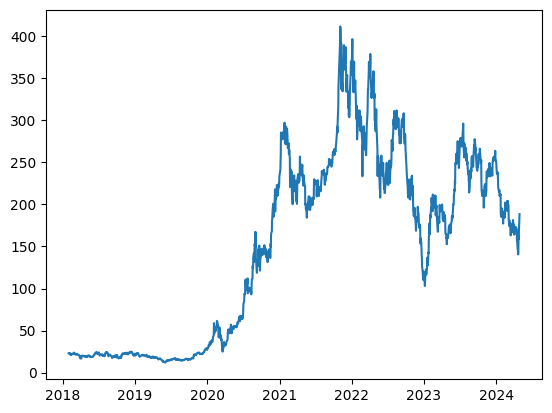

In [4]:
openData = data['Open']
dateData = data['Date']

plot(dateData, openData)
show()

Pour notre projet nous allons utiliser l'algorithme random forest, en temps normal on utilise un échantillon qu'on split de manière à le "mélanger", mais ici nous travaillons sur une série temporelle donc on ne peut pas mélanger les données, au contraire on considère qu'un échantillon donnée ( sur un temps donné donc) influe sur la valeur que l'on cherche à prédire. Il faut donc faire un décalage par rapport à ces données, décalage égal au temps dont on considère qu'il influe sur la valeur à prédire.
Nous commençons par considérer le décalage de 6 mois (ambitieux !) soit environ 180 jours.

In [5]:
for i in range(180, 360):
    data[f'PreviousClose{i}'] = data['Close'].shift(i)
    data[f'PreviousOpen{i}'] = data['Open'].shift(i)
    data[f'PreviousHigh{i}'] = data['High'].shift(i)
    data[f'PreviousLow{i}'] = data['Low'].shift(i)
    data[f'PreviousVolume{i}'] = data['Volume'].shift(i)
    data[f'PreviousAdj Close{i}'] = data['Adj Close'].shift(i)


/tmp/ipykernel_5941/1752680727.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'PreviousOpen{i}'] = data['Open'].shift(i)
/tmp/ipykernel_5941/1752680727.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'PreviousHigh{i}'] = data['High'].shift(i)
/tmp/ipykernel_5941/1752680727.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-frag

On choisit de se concentrer sur la valeur à l'ouverture de chaque jour, donc on retire les autres valeurs puis on parse la date afin d'avoir une valeur temporelle claire.

In [6]:
data.drop(['High', 'Low', 'Close', 'Volume', 'Adj Close'],axis=1,inplace=True)

In [7]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['EndOfYear'] = data['Date'].dt.is_year_end

dateData = data['Date']

/tmp/ipykernel_5941/134887479.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Year'] = data['Date'].dt.year
/tmp/ipykernel_5941/134887479.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Month'] = data['Date'].dt.month
/tmp/ipykernel_5941/134887479.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe

In [8]:
# On divise les données en X et y
X = data.drop(columns=['Date', 'Open'])  # On supprime la colonne de date et la cible

y = data['Open']  # On utilise le cours d'ouverture comme notre y

index = int(len(data) * 0.8) # On prend 80% des données pour l'entrainement

dateData = dateData[index:]

   PreviousClose180  PreviousOpen180  PreviousHigh180  PreviousLow180  \
0               NaN              NaN              NaN             NaN   
1               NaN              NaN              NaN             NaN   
2               NaN              NaN              NaN             NaN   
3               NaN              NaN              NaN             NaN   
4               NaN              NaN              NaN             NaN   

   PreviousVolume180  PreviousAdj Close180  PreviousClose181  PreviousOpen181  \
0                NaN                   NaN               NaN              NaN   
1                NaN                   NaN               NaN              NaN   
2                NaN                   NaN               NaN              NaN   
3                NaN                   NaN               NaN              NaN   
4                NaN                   NaN               NaN              NaN   

   PreviousHigh181  PreviousLow181  ...  PreviousOpen359  PreviousHigh359 

In [9]:

# On divise les données en ensembles d'entraînement et de test

X_train = X[:index]
X_test = X[index:]
y_train = y[:index]
y_test = y[index:]

# On entraîne le modèle Random Forest avec bootstrapping
model = RandomForestRegressor(n_estimators=100, random_state=42, bootstrap=True)
model.fit(X_train, y_train)


predictions = model.predict(X_test)

# On calcule l'erreur quadratique moyenne (RMSE)
rmse = numpy.sqrt(mean_squared_error(y_test, predictions))
n_rmse= rmse / y_test.mean()
print(f'RMSE: {rmse}')
print(f'Normalized RMSE: {n_rmse}')


RMSE: 46.50749069337948
Normalized RMSE: 0.2169678406822831


On observe déjà que notre modèle ne semble pas très performant, mais pour l'instant ce n'est pas très parlant, essayons donc d'afficher les courbes pour comparer en commençant par vérifier que les dimensions nous le permettent.

In [10]:
print('Predictions shape :' + str(predictions.shape))
print('y_test shape :' + str(y_test.shape))
print('X_test shape :' + str(X_test.shape))
print('dateData shape :' + str(dateData.shape))

Predictions shape :(315,)
y_test shape :(315,)
X_test shape :(315, 1085)
dateData shape :(315,)


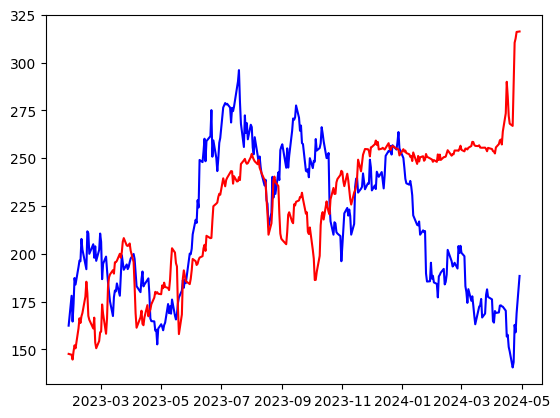

In [11]:
plot(dateData, y_test, 'b-')
plot(dateData, predictions, 'r-')
show()


On constate que c'est un peu un massacre, essayons donc de changer la durée de décalage.

In [10]:
data2 = pandas.read_csv('TSLA.csv', delimiter=',', decimal='.', parse_dates=['Date'])
data2.dropna()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1572 non-null   datetime64[ns]
 1   Open       1572 non-null   float64       
 2   High       1572 non-null   float64       
 3   Low        1572 non-null   float64       
 4   Close      1572 non-null   float64       
 5   Adj Close  1572 non-null   float64       
 6   Volume     1572 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 86.1 KB


On effectue donc la même chose mais pour 10 jours de décalage.

   PreviousClose10  PreviousOpen10  PreviousHigh10  PreviousLow10  \
0              NaN             NaN             NaN            NaN   
1              NaN             NaN             NaN            NaN   
2              NaN             NaN             NaN            NaN   
3              NaN             NaN             NaN            NaN   
4              NaN             NaN             NaN            NaN   

   PreviousVolume10  PreviousAdj Close10  PreviousClose11  PreviousOpen11  \
0               NaN                  NaN              NaN             NaN   
1               NaN                  NaN              NaN             NaN   
2               NaN                  NaN              NaN             NaN   
3               NaN                  NaN              NaN             NaN   
4               NaN                  NaN              NaN             NaN   

   PreviousHigh11  PreviousLow11  ...  PreviousOpen19  PreviousHigh19  \
0             NaN            NaN  ...            

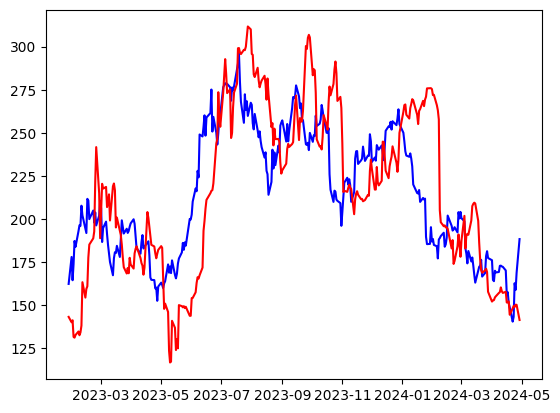

In [11]:
for i in range(10, 20):
    data2[f'PreviousClose{i}'] = data2['Close'].shift(i)
    data2[f'PreviousOpen{i}'] = data2['Open'].shift(i)
    data2[f'PreviousHigh{i}'] = data2['High'].shift(i)
    data2[f'PreviousLow{i}'] = data2['Low'].shift(i)
    data2[f'PreviousVolume{i}'] = data2['Volume'].shift(i)
    data2[f'PreviousAdj Close{i}'] = data2['Adj Close'].shift(i)

data2.drop(['High', 'Low', 'Close', 'Volume', 'Adj Close'],axis=1,inplace=True)

#Add new columns for the year, month, day, day of week, and end of year
data2['Year'] = data2['Date'].dt.year
data2['Month'] = data2['Date'].dt.month
data2['Day'] = data2['Date'].dt.day
data2['DayOfWeek'] = data2['Date'].dt.dayofweek
data2['EndOfYear'] = data2['Date'].dt.is_year_end

dateData2 = data2['Date']

# Diviser les données en fonctionnalités (X) et cible (y)
X = data2.drop(columns=['Date', 'Open'])  # Supprimer la colonne de date et la cible

print(X.head())

y = data2['Open']  # Utiliser le cours d'ouverture comme cible

print(y.head())

index = int(len(data2) * 0.8)

dateData2 = dateData2[index:]



# Diviser les données en ensembles d'entraînement et de test
X_train = X[:index]
X_test = X[index:]
y_train = y[:index]
y_test = y[index:]

# Entraîner un modèle Random Forest avec bootstrapping
model = RandomForestRegressor(n_estimators=100, random_state=42, bootstrap=True)
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
predictions = model.predict(X_test)

# Calculer l'erreur quadratique moyenne (RMSE)
rmse = numpy.sqrt(mean_squared_error(y_test, predictions))
n_rmse= rmse / y_test.mean()
print(f'RMSE: {rmse}')
print(f'Normalized RMSE: {n_rmse}')

print('Predictions shape :' + str(predictions.shape))
print('y_test shape :' + str(y_test.shape))
print('X_test shape :' + str(X_test.shape))
print('dateData2 shape :' + str(dateData2.shape))

plot(dateData2, y_test, 'b-')
plot(dateData2, predictions, 'r-')
show()


Nous allons essayer d'utiliser searchCV pour trouver les meilleurs paramètres pour notre modèle.

In [13]:
from sklearn.model_selection import GridSearchCV # Pour la recherche des hyperparamètres optimaux

In [14]:
n_fold = 10

params = {
    'n_estimators': [250, 500, 750, 1000]
}

rf = RandomForestRegressor()
rf_grid = GridSearchCV(estimator=rf, param_grid=params, scoring='neg_mean_squared_error', cv=n_fold, n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)

# Une fois que le GridSearchCV a fini d'entraîner les modèles et d'évaluer les performances,
# vous pouvez récupérer les meilleurs paramètres et le meilleur modèle entraîné comme ceci :

best_params = rf_grid.best_params_
best_model = rf_grid.best_estimator_

# Vous pouvez alors utiliser le meilleur modèle pour faire des prédictions sur vos données de test :
y_pred = best_model.predict(X_test)

# Et éventuellement évaluer les performances du modèle :
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [16]:
print('rmse : ' + str(numpy.sqrt(mse)))

rmse : 35.020772276773464


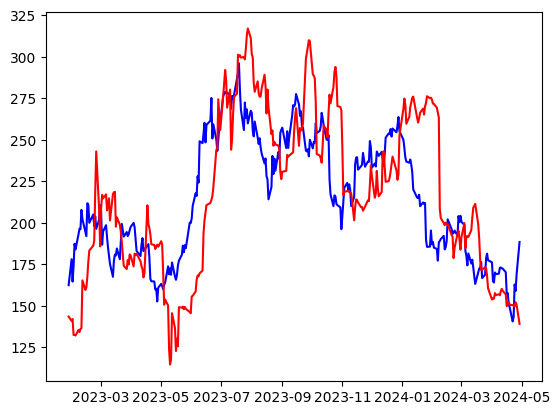

In [15]:
plot(dateData2, y_test, 'b-')
plot(dateData2, y_pred, 'r-')
show()
